In [85]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


data = pd.read_csv('miscdata/mnist/mnist_train.csv')
data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
from math import sqrt

In [86]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets
m, n


(60000, 785)

In [127]:


#print(data_dev)

#Y_dev = data_dev[0]
#X_dev = data_dev[1:n]
#X_dev = X_dev / 255.

data_train = data[:].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [128]:
X_train.shape

(784, 60000)

In [129]:
def init_params():
    W1_std = sqrt(2/784)
    b1_std = sqrt(2/1)
    W2_std = sqrt(2/128)
    b2_std = sqrt(2/1)
    
   
    W1 = np.random.normal(0, W1_std, (128, 784))
    b1 = np.random.normal(0, b1_std, (128, 1))
    W2 = np.random.normal(0, W2_std, (10, 128))
    b2 = np.random.normal(0, b2_std, (10, 1))
    return W1, b1, W2, b2

In [130]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A


def ReLU_deriv(Z):
    return Z > 0


In [131]:
def forward_prop(W1, b1, W2, b2, X):
        Z1 = W1.dot(X) + b1
        A1 = ReLU(Z1)
        Z2 = W2.dot(A1) + b2
        A2 = softmax(Z2)
        return Z1, A1, Z2, A2
  
        

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [132]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [133]:

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [134]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [144]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 600)

Iteration:  0
[6 6 6 ... 6 6 6] [1 7 6 ... 1 1 1]
0.11165
Iteration:  10
[2 7 2 ... 3 1 3] [1 7 6 ... 1 1 1]
0.5667
Iteration:  20
[1 7 1 ... 1 1 1] [1 7 6 ... 1 1 1]
0.7066833333333333
Iteration:  30
[1 7 2 ... 1 1 1] [1 7 6 ... 1 1 1]
0.7710666666666667
Iteration:  40
[1 7 6 ... 1 1 1] [1 7 6 ... 1 1 1]
0.8326833333333333
Iteration:  50
[1 7 6 ... 1 1 1] [1 7 6 ... 1 1 1]
0.88245
Iteration:  60
[1 7 6 ... 1 1 1] [1 7 6 ... 1 1 1]
0.7963333333333333
Iteration:  70
[1 7 6 ... 1 1 1] [1 7 6 ... 1 1 1]
0.8961333333333333
Iteration:  80
[1 7 6 ... 1 1 1] [1 7 6 ... 1 1 1]
0.8992666666666667
Iteration:  90
[1 7 6 ... 1 1 1] [1 7 6 ... 1 1 1]
0.8432
Iteration:  100
[1 7 6 ... 1 1 1] [1 7 6 ... 1 1 1]
0.9071
Iteration:  110
[1 7 6 ... 1 1 1] [1 7 6 ... 1 1 1]
0.9102833333333333
Iteration:  120
[1 7 6 ... 1 1 1] [1 7 6 ... 1 1 1]
0.9122666666666667
Iteration:  130
[1 7 6 ... 1 1 1] [1 7 6 ... 1 1 1]
0.9145166666666666
Iteration:  140
[1 7 6 ... 1 1 1] [1 7 6 ... 1 1 1]
0.9157166666666666
Iter

In [145]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


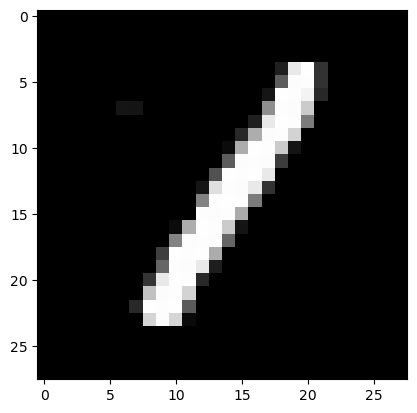

Prediction:  [7]
Label:  7


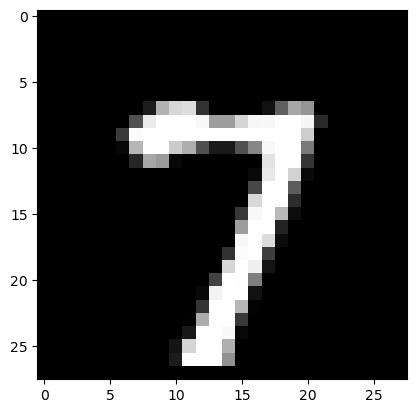

Prediction:  [6]
Label:  6


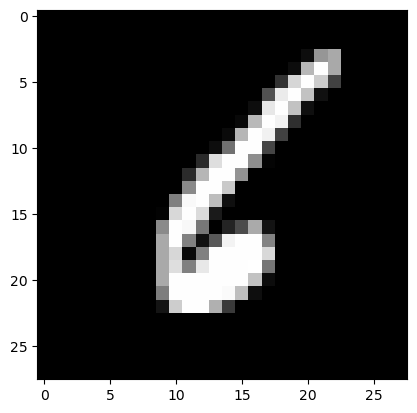

Prediction:  [7]
Label:  7


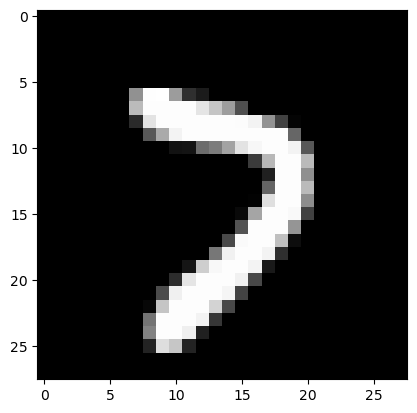

In [137]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)



In [140]:
data = pd.read_csv('miscdata/mnist/mnist_test.csv')

In [141]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

In [146]:
data_test = data[:].T

Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.

print(X_test)
print(X_test.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(784, 10000)


In [147]:


test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test)



[8 8 7 ... 7 7 7] [8 8 7 ... 7 7 7]


0.9509